In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import requests
import scipy.stats as sps

from pymc.Matplot import plot as pmplot

sns.set()

In [2]:
start_date = '2020-03-01'
end_date = '2020-08-08'

url = 'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/{}/{}'.format(start_date,end_date)

r = requests.get(url,timeout=5.0)
r.status_code

200

In [3]:
keys = pd.date_range(start_date,end_date)
keys

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02',
               '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-08'],
              dtype='datetime64[ns]', length=161, freq='D')

In [4]:
json = r.json()
data = json['data']
countries = json['countries']

In [5]:
data_list = []

for k in keys:
    date = k.date().strftime('%Y-%m-%d')
    for c in countries:
        try:
            data_list.append((date,c,data[date][c]['confirmed'],data[date][c]['deaths'],data[date][c]['stringency']))
        except KeyError:
            print ('cant find',c)


cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find CYM
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find AIA
cant find SOM
cant find SOM
cant find CYM
cant find CYM
cant find CYM
cant find CYM
cant find CYM
cant find CYM
cant find CYM
cant f

In [6]:
df = pd.DataFrame(data_list,columns=['date','country','confirmed','dead','oxford_stringency'])
df['date'] = pd.to_datetime(df['date'])
df.set_index(['country','date'],inplace=True)
df.loc['GBR']

,confirmed,dead,oxford_stringency
date,,,
2020-03-01,42.0,0.0,11.11
2020-03-02,47.0,0.0,11.11
2020-03-03,69.0,0.0,11.11
2020-03-04,109.0,0.0,11.11
2020-03-05,164.0,0.0,11.11
...,...,...,...
2020-08-02,303952.0,46193.0,68.06
2020-08-03,304695.0,46201.0,68.06
2020-08-04,305623.0,46210.0,68.06


In [7]:
average_ox_idx = df['oxford_stringency'].groupby(level=0).mean()
average_ox_idx

country
ABW    47.742138
AFG    73.065597
AGO    68.545742
AIA    80.777600
ALB    71.375912
         ...    
VUT    59.987848
YEM    42.935321
ZAF    73.407643
ZMB    45.001761
ZWE    70.703484
Name: oxford_stringency, Length: 179, dtype: float64

In [8]:
population = pd.read_csv('world_pop.csv',sep=';',thousands=',',header=None,index_col=0)
population.columns=['pop']
population.index.name='country'
population

,pop
country,
Afghanistan,38928346
Albania,2877797
Algeria,43851044
American Samoa,55191
Andorra,77265
...,...
Wallis & Futuna,11239
Western Sahara,597339
Yemen,29825964


In [9]:
three_letter_abb = pd.read_csv('three_letter_country_abb.csv',sep=';',header=None,index_col=2)
three_letter_abb = three_letter_abb[0]
three_letter_abb.loc['GBR']

'UK'

In [10]:
df = df.reset_index(level=1)

In [11]:
df.loc['GBR']

,date,confirmed,dead,oxford_stringency
country,,,,
GBR,2020-03-01,42.0,0.0,11.11
GBR,2020-03-02,47.0,0.0,11.11
GBR,2020-03-03,69.0,0.0,11.11
GBR,2020-03-04,109.0,0.0,11.11
GBR,2020-03-05,164.0,0.0,11.11
...,...,...,...,...
GBR,2020-08-02,303952.0,46193.0,68.06
GBR,2020-08-03,304695.0,46201.0,68.06
GBR,2020-08-04,305623.0,46210.0,68.06


In [12]:
df = df.join(three_letter_abb)

In [13]:
df.rename(columns={0 : 'country'},inplace=True)

In [14]:
df = df.join(average_ox_idx,lsuffix='_current',rsuffix='_mean')

In [15]:
df

,date,confirmed,dead,oxford_stringency_current,country,oxford_stringency_mean
ABW,2020-03-01,NaN,NaN,0.00,Aruba,47.742138
ABW,2020-03-02,NaN,NaN,0.00,Aruba,47.742138
ABW,2020-03-03,NaN,NaN,0.00,Aruba,47.742138
ABW,2020-03-04,NaN,NaN,0.00,Aruba,47.742138
ABW,2020-03-05,NaN,NaN,0.00,Aruba,47.742138
...,...,...,...,...,...,...
ZWE,2020-07-29,2817.0,40.0,80.56,Zimbabwe,70.703484
ZWE,2020-08-03,3921.0,70.0,80.56,Zimbabwe,70.703484
ZWE,2020-08-04,4075.0,80.0,80.56,Zimbabwe,70.703484
ZWE,2020-08-05,4221.0,81.0,80.56,Zimbabwe,70.703484


In [16]:
foo = df.merge(population,left_on='country',right_on=population.index)
foo['dead_per_M'] = foo['dead'] / (foo['pop'] / 1e6)
foo

,date,confirmed,dead,oxford_stringency_current,country,oxford_stringency_mean,pop,dead_per_M
0,2020-03-01,NaN,NaN,0.00,Aruba,47.742138,106766,NaN
1,2020-03-02,NaN,NaN,0.00,Aruba,47.742138,106766,NaN
2,2020-03-03,NaN,NaN,0.00,Aruba,47.742138,106766,NaN
3,2020-03-04,NaN,NaN,0.00,Aruba,47.742138,106766,NaN
4,2020-03-05,NaN,NaN,0.00,Aruba,47.742138,106766,NaN
...,...,...,...,...,...,...,...,...
26389,2020-07-29,2817.0,40.0,80.56,Zimbabwe,70.703484,14862924,2.691260
26390,2020-08-03,3921.0,70.0,80.56,Zimbabwe,70.703484,14862924,4.709706
26391,2020-08-04,4075.0,80.0,80.56,Zimbabwe,70.703484,14862924,5.382521
26392,2020-08-05,4221.0,81.0,80.56,Zimbabwe,70.703484,14862924,5.449802


In [17]:
three_letter_abb.name='country'
three_letter_abb.index.name='abb'
three_letter_abb = pd.DataFrame(three_letter_abb)
three_letter_abb.columns=['country']
three_letter_abb.reset_index(inplace=True)


In [18]:
three_letter_abb

,abb,country
0,AFG,Afghanistan
1,ALB,Albania
2,DZA,Algeria
3,ASM,American Samoa
4,AND,Andorra
...,...,...
256,ESH,Western Sahara
257,YEM,Yemen
258,ZMB,Zambia
259,ZWE,Zimbabwe


In [19]:
foo = foo.merge(three_letter_abb,left_on='country',right_on='country')
foo

,date,confirmed,dead,oxford_stringency_current,country,oxford_stringency_mean,pop,dead_per_M,abb
0,2020-03-01,NaN,NaN,0.00,Aruba,47.742138,106766,NaN,ABW
1,2020-03-02,NaN,NaN,0.00,Aruba,47.742138,106766,NaN,ABW
2,2020-03-03,NaN,NaN,0.00,Aruba,47.742138,106766,NaN,ABW
3,2020-03-04,NaN,NaN,0.00,Aruba,47.742138,106766,NaN,ABW
4,2020-03-05,NaN,NaN,0.00,Aruba,47.742138,106766,NaN,ABW
...,...,...,...,...,...,...,...,...,...
26389,2020-07-29,2817.0,40.0,80.56,Zimbabwe,70.703484,14862924,2.691260,ZWE
26390,2020-08-03,3921.0,70.0,80.56,Zimbabwe,70.703484,14862924,4.709706,ZWE
26391,2020-08-04,4075.0,80.0,80.56,Zimbabwe,70.703484,14862924,5.382521,ZWE
26392,2020-08-05,4221.0,81.0,80.56,Zimbabwe,70.703484,14862924,5.449802,ZWE


In [20]:
gbr = foo.loc[foo['abb'] == 'GBR']
gbr

,date,confirmed,dead,oxford_stringency_current,country,oxford_stringency_mean,pop,dead_per_M,abb
8923,2020-03-01,42.0,0.0,11.11,UK,63.295786,67886011,0.000000,GBR
8924,2020-03-02,47.0,0.0,11.11,UK,63.295786,67886011,0.000000,GBR
8925,2020-03-03,69.0,0.0,11.11,UK,63.295786,67886011,0.000000,GBR
8926,2020-03-04,109.0,0.0,11.11,UK,63.295786,67886011,0.000000,GBR
8927,2020-03-05,164.0,0.0,11.11,UK,63.295786,67886011,0.000000,GBR
...,...,...,...,...,...,...,...,...,...
9077,2020-08-02,303952.0,46193.0,68.06,UK,63.295786,67886011,680.449467,GBR
9078,2020-08-03,304695.0,46201.0,68.06,UK,63.295786,67886011,680.567312,GBR
9079,2020-08-04,305623.0,46210.0,68.06,UK,63.295786,67886011,680.699887,GBR
9080,2020-08-05,306293.0,46299.0,68.06,UK,63.295786,67886011,682.010908,GBR


In [21]:
last_data_date = gbr['date'].iloc[-1]
last_data_date

Timestamp('2020-08-06 00:00:00')

In [22]:
last_days = foo.loc[foo['date'] == last_data_date]
drop = ['San Marino','Andorra']

mask = last_days['country'].isin(drop)
last_days = last_days[~mask]

#last_days = last_days.merge(three_letter_abb,left_on='country',right_on='country')

last_days['conf_per_M'] = last_days['confirmed'] / (last_days['pop'] / 1e6)

### MASK ###
mask2 = last_days['dead_per_M'] > 10
############

last_days = last_days[mask2]
last_days['dead_per_M_log'] = np.log10(last_days['dead_per_M'])

last_days

,date,confirmed,dead,oxford_stringency_current,country,oxford_stringency_mean,pop,dead_per_M,abb,conf_per_M,dead_per_M_log
158,2020-08-06,171.0,3.0,32.41,Aruba,47.742138,106766,28.098833,ABW,1601.633479,1.448688
317,2020-08-06,36896.0,1298.0,78.70,Afghanistan,73.065597,38928346,33.343312,AFG,947.792644,1.523009
720,2020-08-06,5889.0,182.0,59.26,Albania,71.375912,2877797,63.242821,ALB,2046.356988,1.801011
1034,2020-08-06,61860.0,355.0,50.00,United Arab Emirates,65.381032,9890402,35.893384,ARE,6254.548602,1.555014
1193,2020-08-06,213522.0,4009.0,88.89,Argentina,84.294025,45195774,88.702984,ARG,4724.379762,1.947938
...,...,...,...,...,...,...,...,...,...,...,...
25138,2020-08-06,75490.0,1788.0,54.17,Ukraine,66.219811,43733762,40.883746,UKR,1726.126373,1.611551
25297,2020-08-06,1309.0,37.0,22.22,Uruguay,47.879874,3473730,10.651375,URY,376.828366,1.027406
25456,2020-08-06,4823891.0,158256.0,68.98,US,66.205660,331002651,478.110974,USA,14573.572101,2.679529
25922,2020-08-06,1764.0,508.0,31.48,Yemen,42.935321,29825964,17.032140,YEM,59.143101,1.231269


In [23]:
last_days.sort_values('oxford_stringency_mean',ascending=True).head(50)



,date,confirmed,dead,oxford_stringency_current,country,oxford_stringency_mean,pop,dead_per_M,abb,conf_per_M,dead_per_M_log
17753,2020-08-06,3902.0,123.0,16.67,Nicaragua,11.809484,6624554,18.567288,NIC,589.020785,1.268748
3094,2020-08-06,68376.0,577.0,11.11,Belarus,11.966541,9449323,61.062576,BLR,7236.073949,1.785775
22934,2020-08-06,81540.0,5760.0,38.89,Sweden,38.143141,10099265,570.338535,SWE,8073.854880,2.756133
12235,2020-08-06,1926.0,10.0,39.81,Iceland,40.384025,341243,29.304630,ISL,5644.071820,1.466936
25922,2020-08-06,1764.0,508.0,31.48,Yemen,42.935321,29825964,17.032140,YEM,59.143101,1.231269
8451,2020-08-06,7512.0,331.0,37.96,Finland,44.926603,5540720,59.739528,FIN,1355.780476,1.776262
8136,2020-08-06,2113.0,63.0,27.78,Estonia,45.230252,1326535,47.492151,EST,1592.871654,1.676622
14916,2020-08-06,7007.0,118.0,22.22,Luxembourg,47.488805,625978,188.505027,LUX,11193.684123,2.275323
158,2020-08-06,171.0,3.0,32.41,Aruba,47.742138,106766,28.098833,ABW,1601.633479,1.448688
25297,2020-08-06,1309.0,37.0,22.22,Uruguay,47.879874,3473730,10.651375,URY,376.828366,1.027406


In [24]:
last_days.shape

(96, 11)

In [25]:
x = last_days['oxford_stringency_mean']

y_param = 'dead_per_M'

if y_param == 'dead_per_M':
    beta_mean = 0
    beta_std = 1
    alpha_low = -500
    alpha_high = 500
    obs_sigma_high = 500
    
else:
    beta_mean = 0
    beta_std = 1000
    alpha_low = -4000
    alpha_high = 4000
    obs_sigma_high = 10000

alpha = pm.Uniform('alpha',alpha_low,alpha_high)
#beta = pm.Uniform('beta',beta_low,beta_high)
beta = pm.Normal('beta',beta_mean, 1 / beta_std **2)
obs_sigma = pm.Uniform('obs_sigma',0,obs_sigma_high)

@pm.deterministic
def linreq(x=x,alpha=alpha,beta=beta):
    return alpha + x * beta

obs = pm.Normal('obs',mu = linreq,tau = 1 / obs_sigma ** 2,observed = True,value = last_days[y_param])

model = pm.Model([alpha,beta,linreq,obs])

map_ = pm.MAP(model)
map_.fit()

mcmc = pm.MCMC(model)

sample = mcmc.sample(50000,20000,3)

 [-----------------100%-----------------] 50000 of 50000 complete in 70.9 sec

Plotting beta_post
Plotting alpha_post
Plotting obs_sigma_post


,beta_post,alpha_post,obs_sigma_post
count,10000.000000,10000.000000,10000.000000
mean,0.432158,106.934156,173.514740
std,0.769908,52.899903,12.580028
min,-2.137394,-104.758745,132.289251
25%,-0.093867,69.869798,164.625317
50%,0.444028,106.115481,172.612182
75%,0.961258,143.971718,181.637900
max,3.276416,281.230958,244.111465


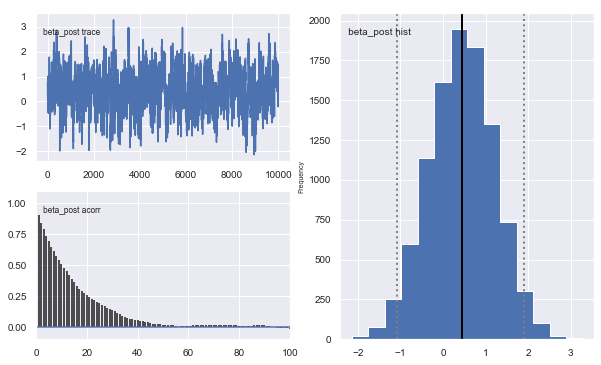

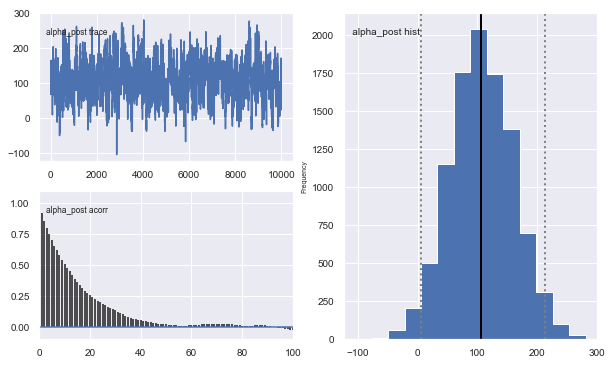

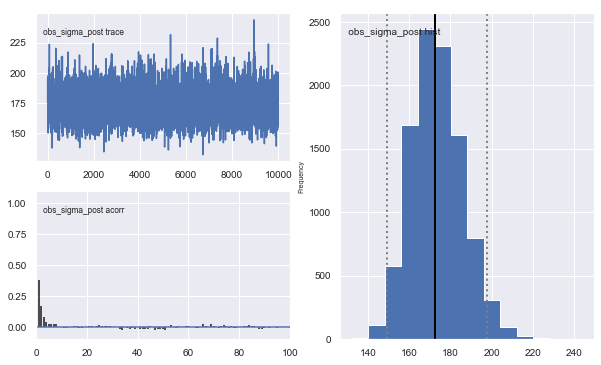

In [26]:
beta_post = mcmc.trace('beta')[:]
alpha_post = mcmc.trace('alpha')[:]
obs_sigma_post = mcmc.trace('obs_sigma')[:]

pmplot(beta_post,'beta_post')
pmplot(alpha_post,'alpha_post')
pmplot(obs_sigma_post,'obs_sigma_post')

result = pd.DataFrame({'beta_post' : beta_post,
                      'alpha_post' : alpha_post,
                      'obs_sigma_post' : obs_sigma_post})

result.describe()

In [27]:
beta_ci = np.percentile(result['beta_post'],[5.5,94.5])
alpha_ci = np.percentile(result['alpha_post'],[5.5,94.5])

In [28]:
mean_req = np.array([x * result['beta_post'].mean() + result['alpha_post'].mean() for x in range(0,101)])

slope,intercept,_,_,_ = sps.linregress(last_days['oxford_stringency_mean'],last_days[y_param])

least_squares = np.array([x * slope + intercept for x in range(0,101)])

In [29]:
X = np.linspace(0,100,1000)
rows = np.random.choice(result.index,replace=True,size=len(X))
beta_samples = result['beta_post'][rows]
alpha_samples = result['alpha_post'][rows]

lines = np.array([X[i] * beta_samples + alpha_samples for i in range(len(X))])

samples = np.array([pm.rnormal(X[i] * result.beta_post[rows] + result.alpha_post[rows],
                                      1 / result.obs_sigma_post[rows] ** 2,size=len(X)) for i in range(len(X))])

high,low = np.percentile(samples,[5.5,94.5],axis=1)




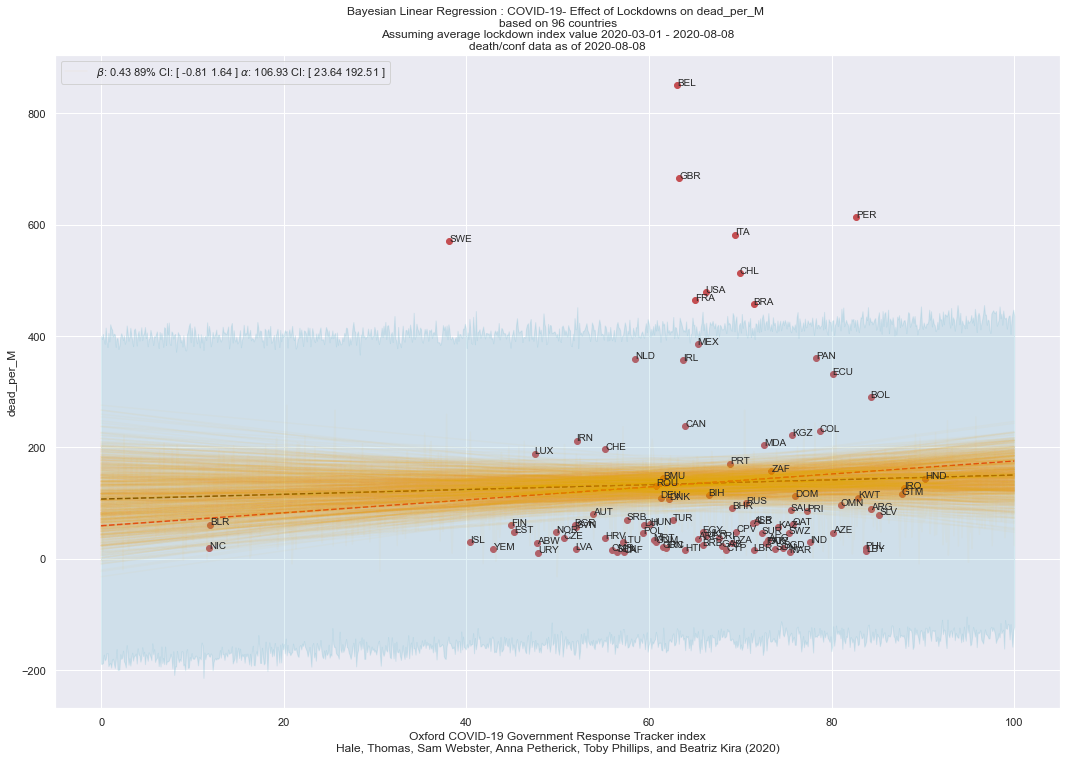

In [30]:
plt.figure(figsize=(18,12))
plt.title('Bayesian Linear Regression : COVID-19'\
          '- Effect of Lockdowns on {} \n'.format(y_param)+\
          'based on {} countries\n'.format(len(last_days))+\
          'Assuming average lockdown index value {} - {}\n'.format(start_date,end_date)+\
         'death/conf data as of {}'.format(end_date))

plt.scatter(last_days['oxford_stringency_mean'],last_days[y_param],color='r')
plt.ylabel(y_param)
plt.xlabel('Oxford COVID-19 Government Response Tracker index\nHale, Thomas, Sam Webster, Anna Petherick, Toby Phillips, and Beatriz Kira (2020)')

plt.plot(range(0,101),mean_req,ls='dashed',color='k')
plt.plot(range(0,101),least_squares,ls='dashed',color='crimson')

plt.fill_between(X,high,low,color='c',alpha=0.2)

countries_of_interest = ['SWE','GBR','BEL','ESP','ITA','PER','FRA',
                         'USA','DNK','FIN','NOR','BRA','CHL','QAT','BHR',
                        'HNT','GTM','NIC','JPN','ISL','ARG','NLD','DEU','ZAF','HND','IRQ']

for i,p in enumerate(last_days['oxford_stringency_mean']):
    #if last_days.iloc[i]['abb'] in countries_of_interest:
    plt.text(last_days.iloc[i]['oxford_stringency_mean'],last_days.iloc[i][y_param],last_days.iloc[i]['abb'])

plt.plot(X,lines[0,:],
         color='orange',
         alpha=0.03,
         label=r'$\beta$: {:.2f} 89% CI: [ {:.2f} {:.2f} ] $\alpha$: {:.2f} CI: [ {:.2f} {:.2f} ]'.format(
         result.beta_post.mean(),beta_ci[0],beta_ci[1],result.alpha_post.mean(),alpha_ci[0],alpha_ci[1]))

_=plt.plot(X,lines,color='orange',alpha=0.03)

plt.legend(loc='upper left')

plt.savefig('lockdown_index_{}.jpg'.format(y_param),format='jpg',dpi=400)

In [31]:
foo.dropna(inplace=True)

In [32]:
countries = foo.groupby('country')
some_countries = ['Sweden','Belgium','UK','South Africa','Germany','US',
                  'Denmark','Australia','Italy','France','Argentina','Brazil','Chile','Peru']

colors = ['black','grey','lightcoral','mistyrose','tan','gold','crimson','yellow',
         'deepskyblue','royalblue','orangered','lime','aqua','darkmagenta']



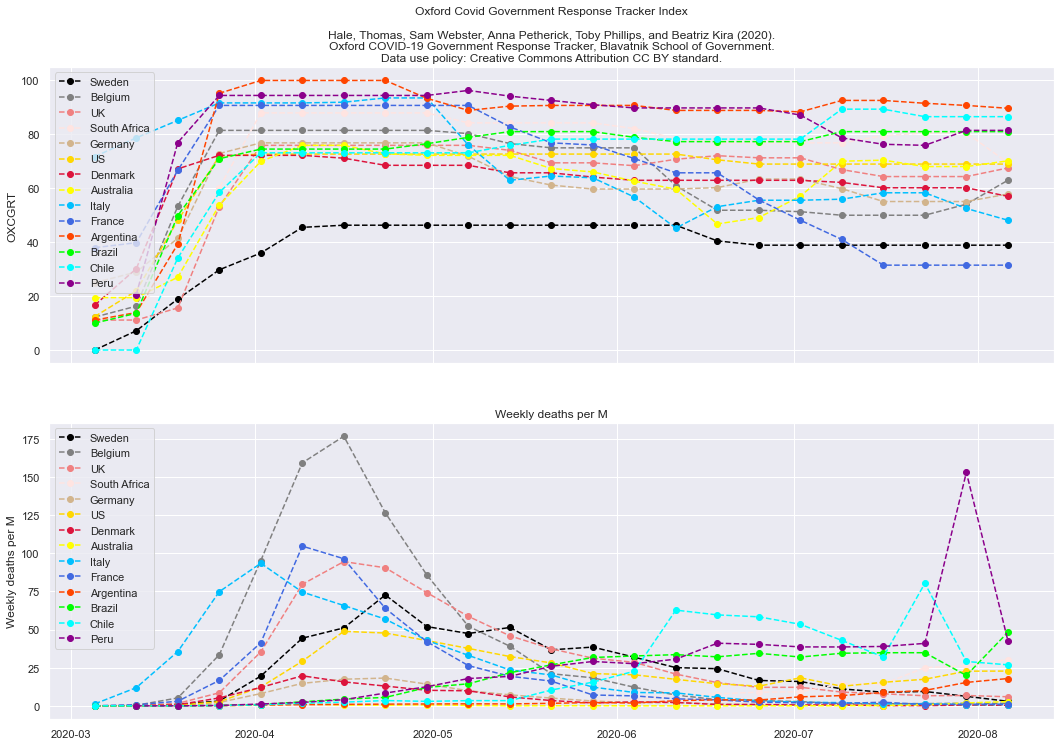

In [33]:
from datetime import datetime

weeklies = dict()

fig,ax = plt.subplots(2,1,sharex=True,figsize=(18,12))


for i,c in enumerate(some_countries):
    country = (countries.get_group(c)).copy()
    country.set_index('date',inplace=True)
    country['dead_inc'] = country['dead'] - country['dead'].shift()
    country['dead_inc_per_M'] = country['dead_inc'] / (country['pop'] / 1e6)
    
    resample_period = ['W-MON','W-TUE','W-WED','W-THU','W-FRI','W-SAT','W-SUN']
    
    #today = datetime.today().weekday()
    last_data_day = last_data_date.weekday()

    #yesterday = lambda i : resample_period[i % 7 -1] if i != 0 else resample_period[6]
    period = resample_period[last_data_day]
    
    weekly = country.resample(period).agg({'dead_inc_per_M' : np.sum, 'dead_per_M' :np.sum,
                                           'oxford_stringency_current' : np.mean})
    
    weeklies[c] = weekly
        
    ax[1].plot(weekly.index,weekly['dead_inc_per_M'],'o--',label=c,color=colors[i])
    ax[0].plot(weekly.index,weekly['oxford_stringency_current'],'o--',label=c,color=colors[i])
 
citation = '\nHale, Thomas, Sam Webster, Anna Petherick, Toby Phillips, and Beatriz Kira (2020).\nOxford COVID-19 Government Response Tracker, Blavatnik School of Government.\nData use policy: Creative Commons Attribution CC BY standard.'
ax[0].legend(loc='upper left')
ax[0].set_title('Oxford Covid Government Response Tracker Index\n' + citation)
ax[0].set_ylabel('OXCGRT')
#ax[0].set_yscale('log')
ax[1].legend(loc='upper left')
ax[1].set_title('Weekly deaths per M')
ax[1].set_ylabel('Weekly deaths per M')
#ax[1].set_yscale('log')
plt.savefig('oxcgrt_country_plot.jpg',format='jpg',dpi=400)

In [34]:
steps = 100000
burn = 40000
thin = 3

dist_size = (steps - burn) // thin

def inference(x,y):
    
    beta_mean = 0
    beta_std = 10
    alpha_low = -500
    alpha_high = 500
    obs_sigma_high = 1000

    alpha = pm.Uniform('alpha',alpha_low,alpha_high)
    beta = pm.Normal('beta',beta_mean, 1 / beta_std **2)
    obs_sigma = pm.Uniform('obs_sigma',0,obs_sigma_high)

    @pm.deterministic
    def linreq(x=x,alpha=alpha,beta=beta):
        return alpha + x * beta

    obs = pm.Normal('obs',mu = linreq,tau = 1 / obs_sigma ** 2,observed = True,value = y)

    model = pm.Model([alpha,beta,linreq,obs])

    map_ = pm.MAP(model)
    map_.fit()

    mcmc = pm.MCMC(model)

    sample = mcmc.sample(steps,burn,thin)   
    
    beta_post = mcmc.trace('beta')[:]
    alpha_post = mcmc.trace('alpha')[:]
    obs_sigma_post = mcmc.trace('obs_sigma')[:]

    pmplot(beta_post,'beta_post')
    pmplot(alpha_post,'alpha_post')
    pmplot(obs_sigma_post,'obs_sigma_post')

    result = pd.DataFrame({'beta_post' : beta_post,
                          'alpha_post' : alpha_post,
                          'obs_sigma_post' : obs_sigma_post})

    return result


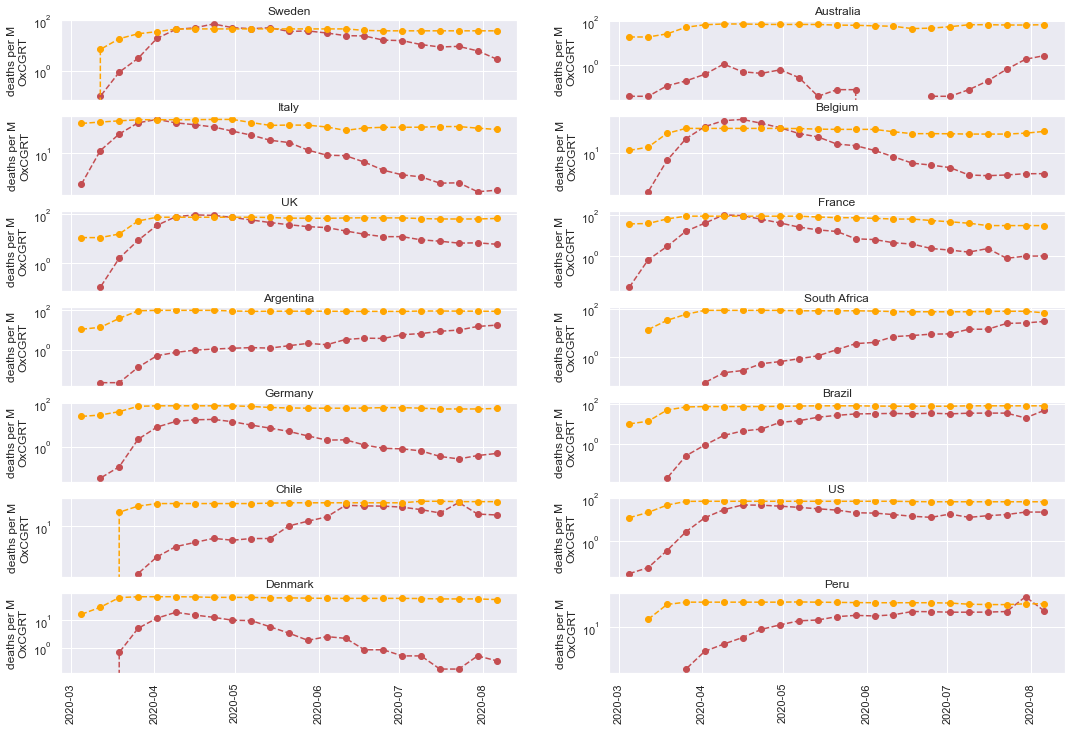

In [35]:
import scipy.stats as sps

weeklies_df = pd.DataFrame()


fig,axes = plt.subplots(7,2,sharex=True,figsize=(18,12))

for i,k in enumerate(weeklies.keys()):
        
    weeklies[k]['country'] = k
        
    weeklies_df = pd.concat([weeklies_df,weeklies[k]])
    
    
    axes[i % 7,i % 2].plot(weeklies[k].index,weeklies[k]['dead_inc_per_M'],'o--',label='weekly deaths per M',
                           color='r')
    axes[i % 7,i % 2].plot(weeklies[k].index,weeklies[k]['oxford_stringency_current'],'o--',label='weekly deaths per M',
                           color='orange')
    axes[i % 7,i % 2].tick_params('x',rotation=90)
    axes[i % 7,i % 2].set_title('{}'.format(k))
    axes[i % 7, i % 2].set_ylabel('deaths per M\nOxCGRT')
    axes[i % 7, i % 2].set_ylim([0,200])
    #axes[i % 7, i % 2].set_yscale('log')
    
plt.savefig('oxcgrt_14.jpg',format='jpg',dpi=400)

 [-----------------100%-----------------] 100000 of 100000 complete in 143.8 secPlotting beta_post
Plotting alpha_post
Plotting obs_sigma_post
 [-----------------100%-----------------] 100000 of 100000 complete in 137.7 secPlotting beta_post
Plotting alpha_post
Plotting obs_sigma_post
 [-----------------100%-----------------] 100000 of 100000 complete in 145.7 secPlotting beta_post
Plotting alpha_post
Plotting obs_sigma_post
 [-----------------100%-----------------] 100000 of 100000 complete in 121.2 secPlotting beta_post
Plotting alpha_post
Plotting obs_sigma_post
 [-----------------100%-----------------] 100000 of 100000 complete in 144.7 secPlotting beta_post
Plotting alpha_post
Plotting obs_sigma_post
 [-----------------100%-----------------] 100000 of 100000 complete in 129.6 secPlotting beta_post
Plotting alpha_post
Plotting obs_sigma_post
 [-----------------100%-----------------] 100000 of 100000 complete in 129.4 secPlotting beta_post
Plotting alpha_post
Plotting obs_sigma_post

/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


 [-----------------100%-----------------] 100000 of 100000 complete in 132.4 secPlotting beta_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting alpha_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting obs_sigma_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


 [-----------------100%-----------------] 100000 of 100000 complete in 135.0 secPlotting beta_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting alpha_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting obs_sigma_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


 [-----------------100%-----------------] 100000 of 100000 complete in 136.9 secPlotting beta_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting alpha_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting obs_sigma_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


 [-----------------100%-----------------] 100000 of 100000 complete in 129.4 secPlotting beta_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting alpha_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting obs_sigma_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


 [-----------------100%-----------------] 100000 of 100000 complete in 133.5 secPlotting beta_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting alpha_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting obs_sigma_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


 [-----------------100%-----------------] 100000 of 100000 complete in 134.2 secPlotting beta_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting alpha_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting obs_sigma_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


 [-----------------100%-----------------] 100000 of 100000 complete in 128.6 secPlotting beta_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting alpha_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting obs_sigma_post


/usr/lib/python3.6/site-packages/pymc/Matplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


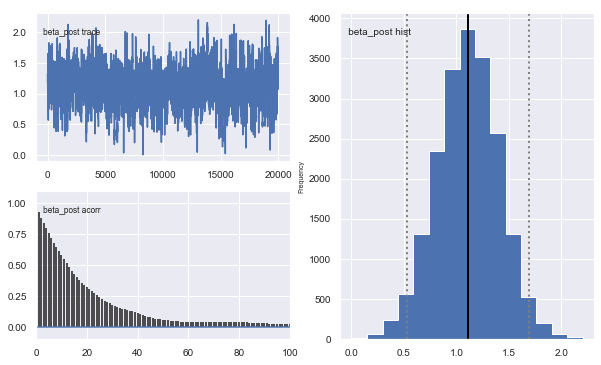

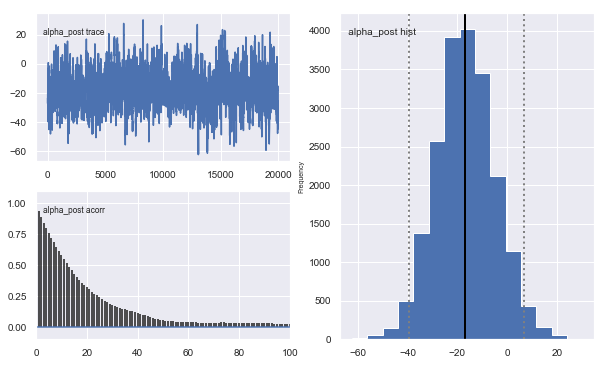

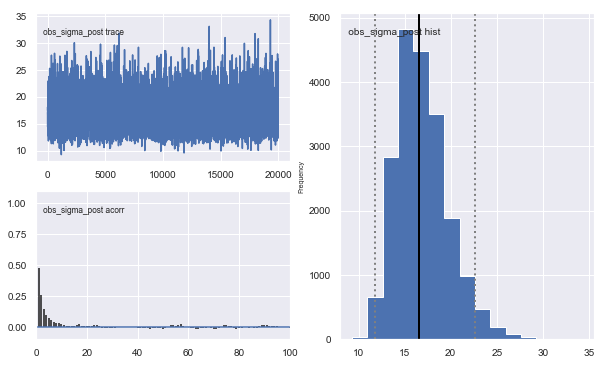

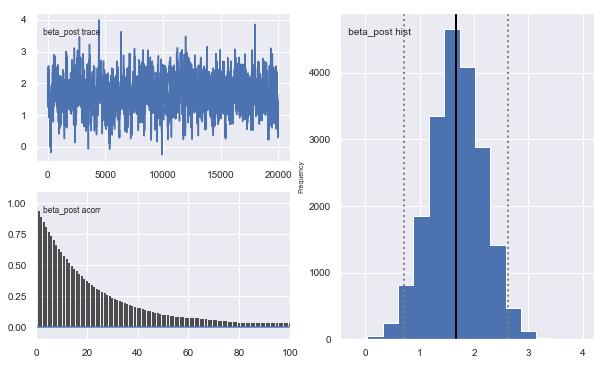

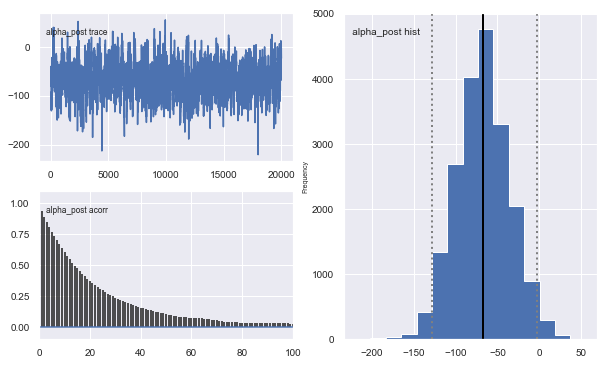

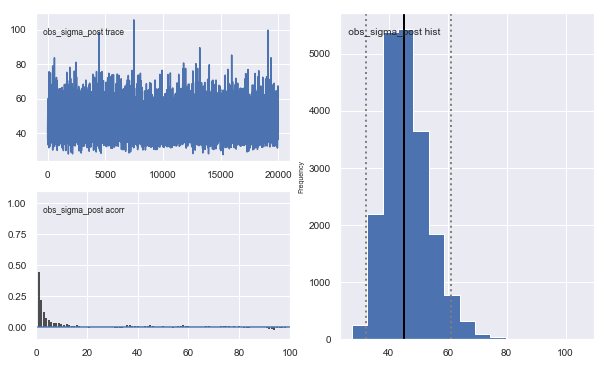

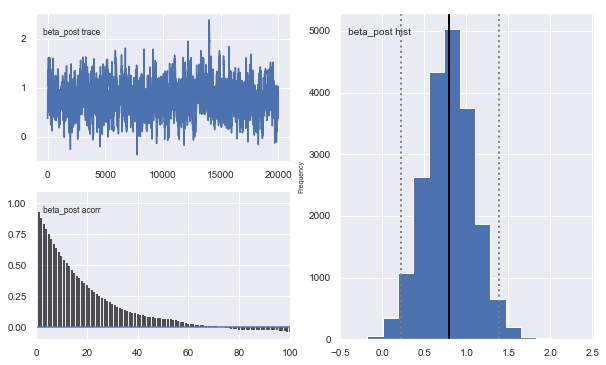

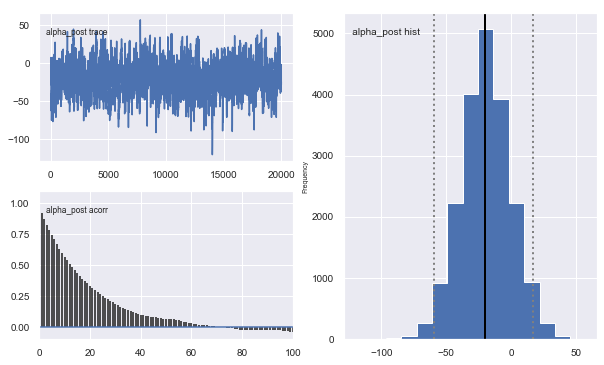

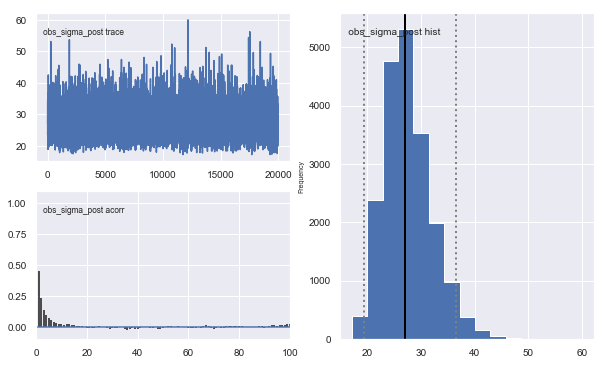

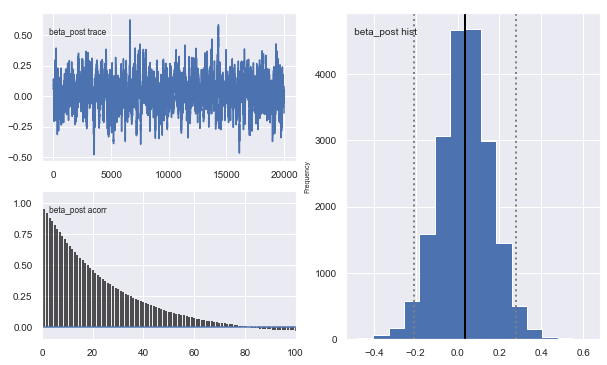

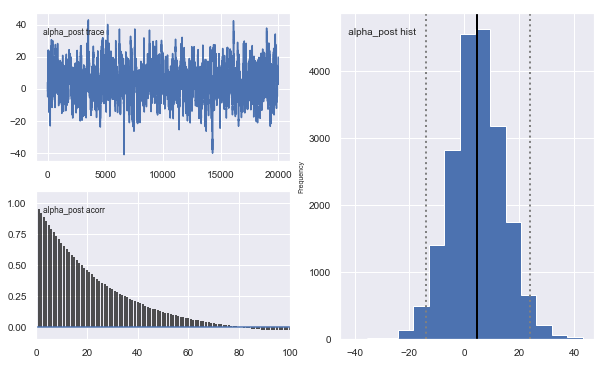

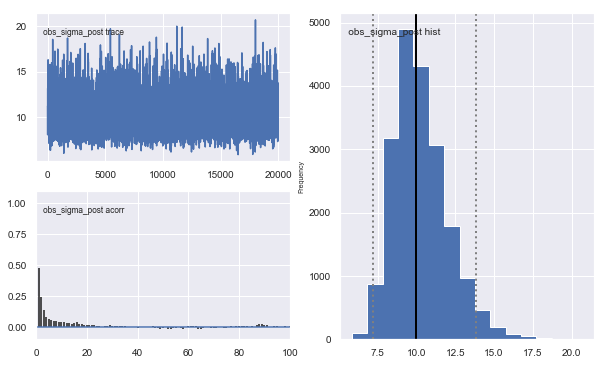

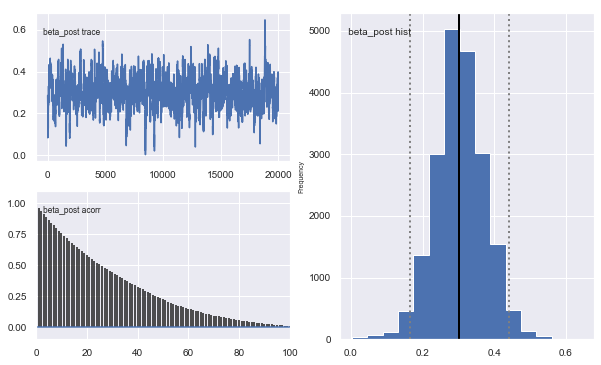

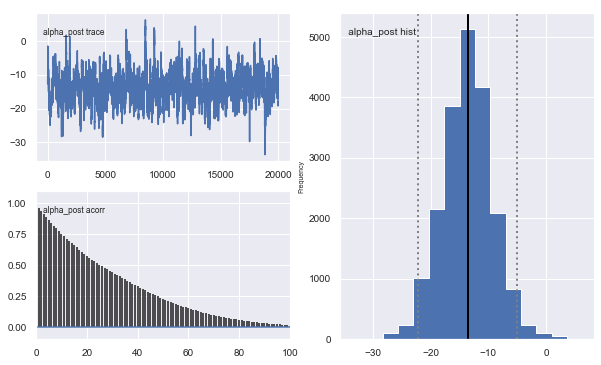

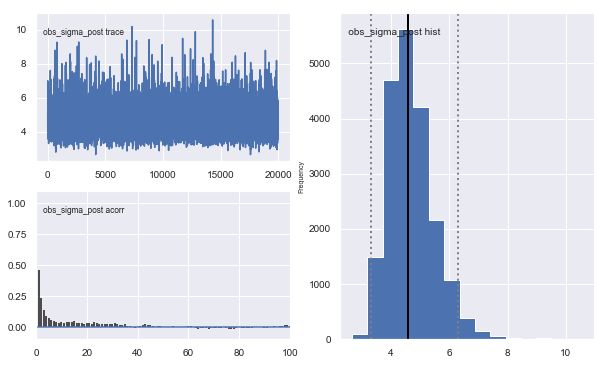

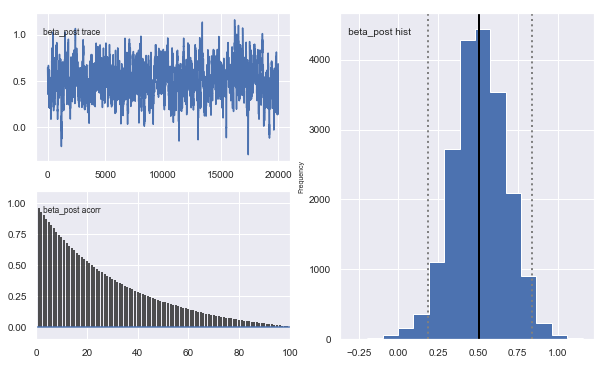

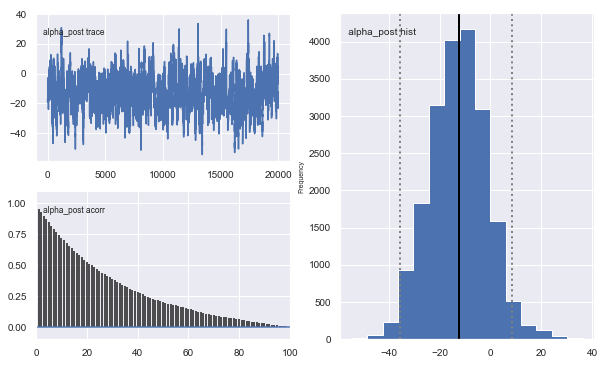

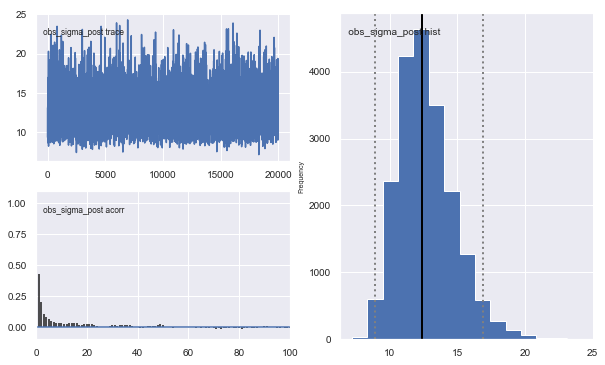

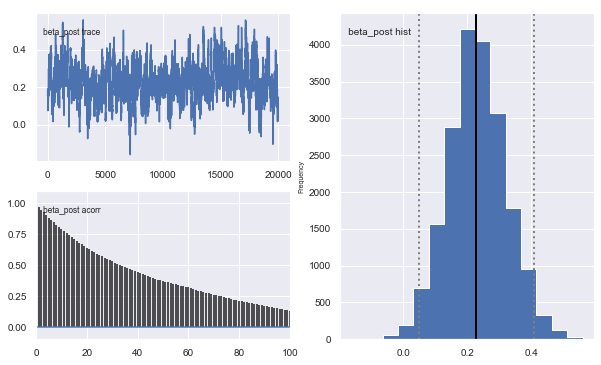

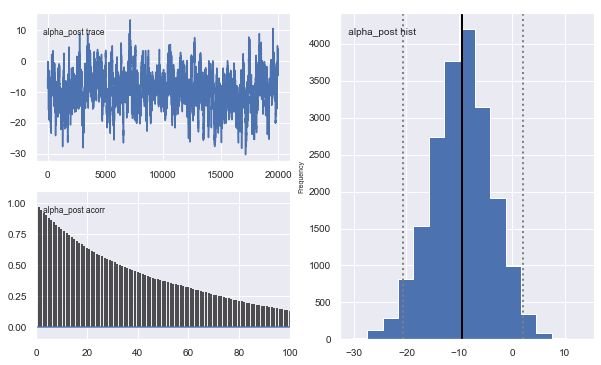

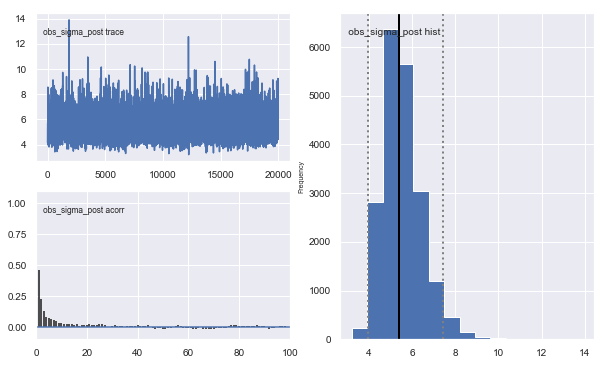

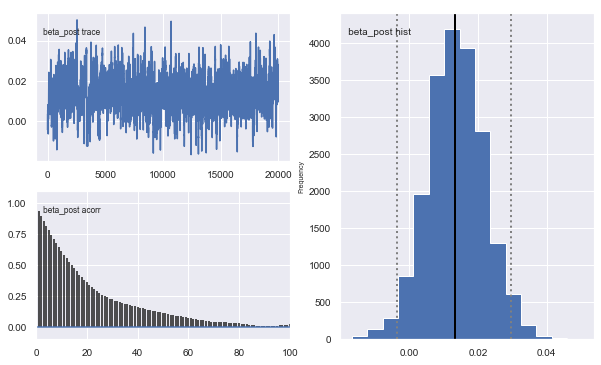

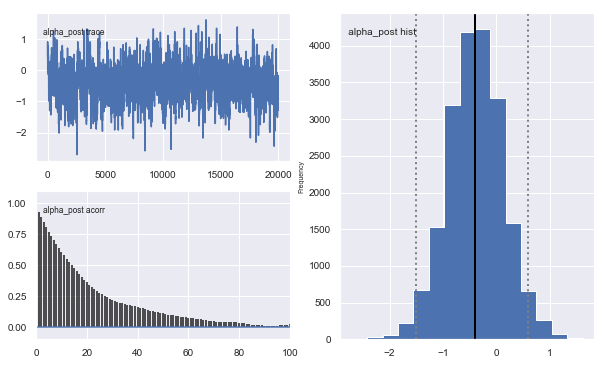

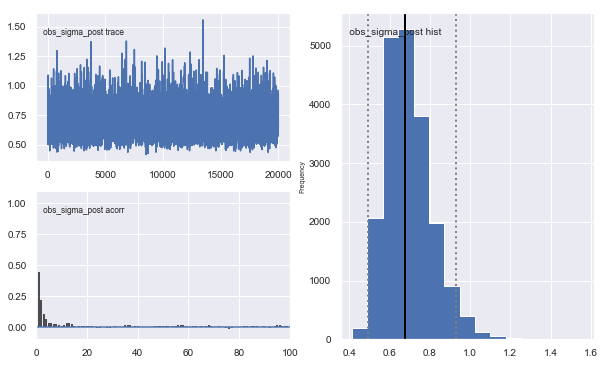

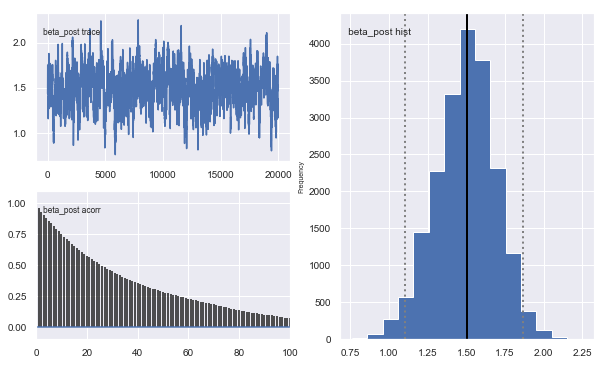

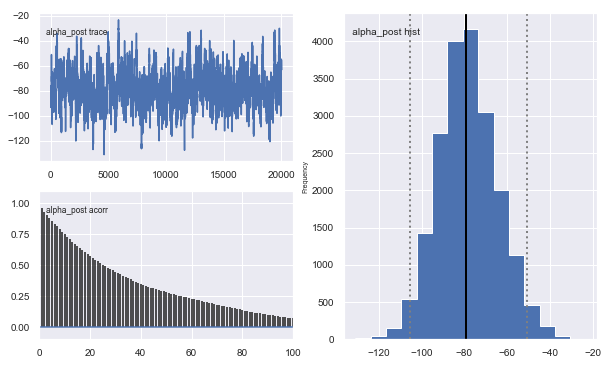

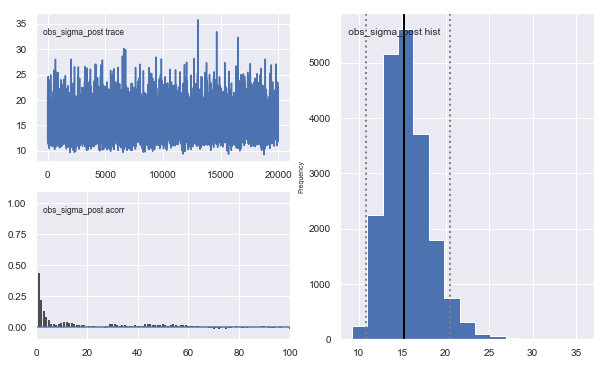

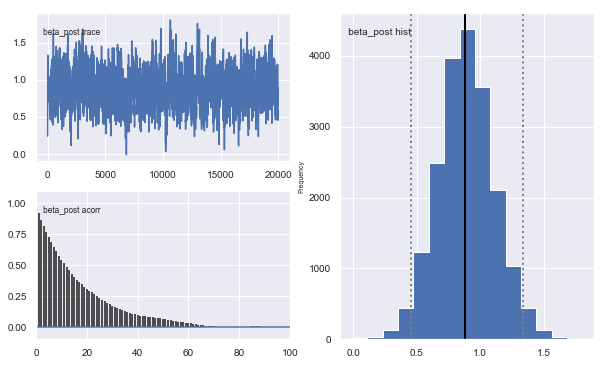

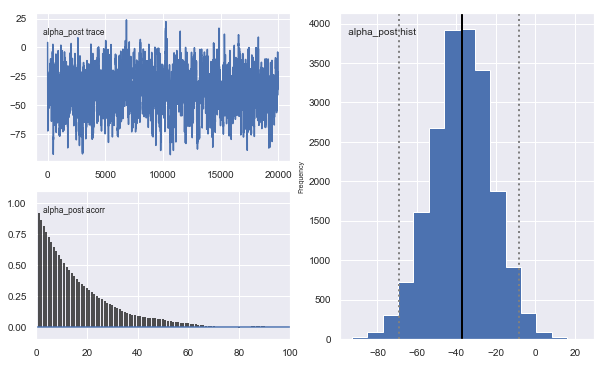

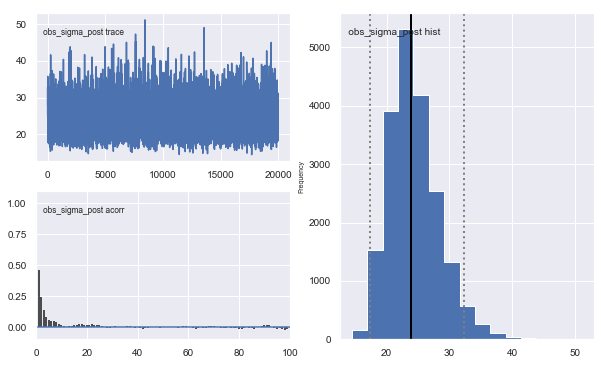

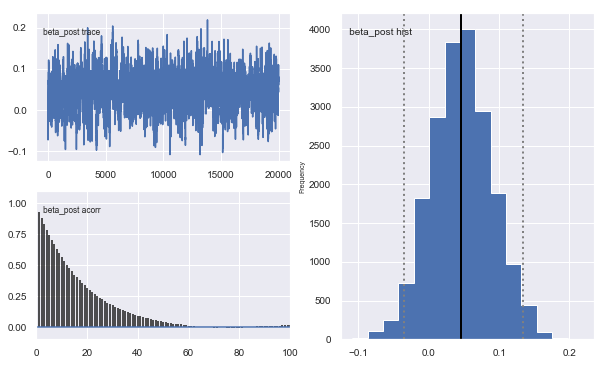

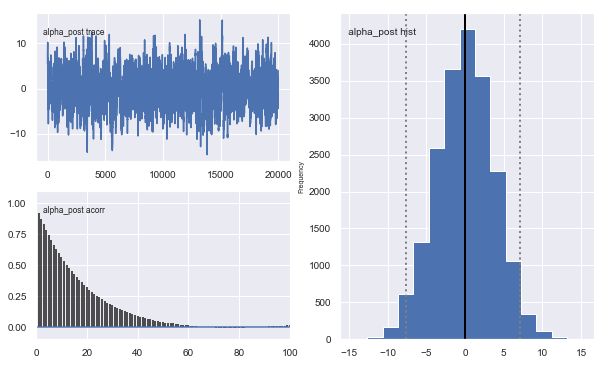

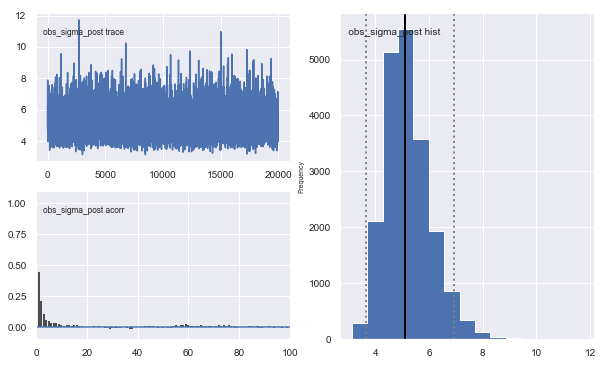

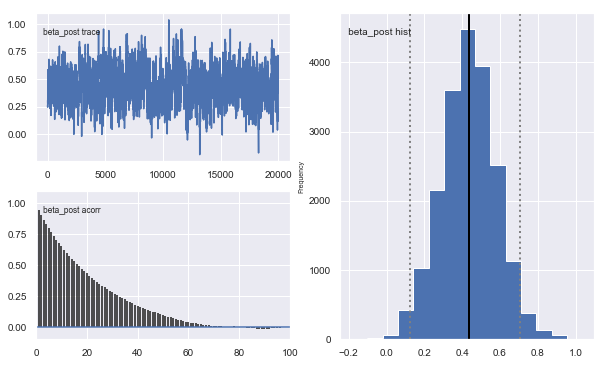

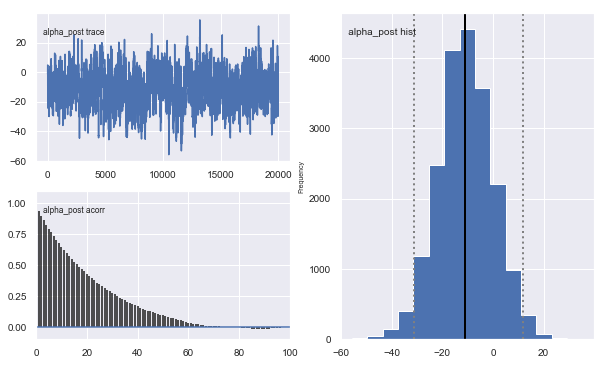

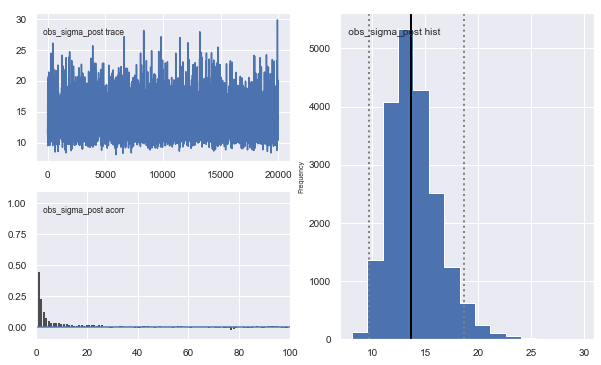

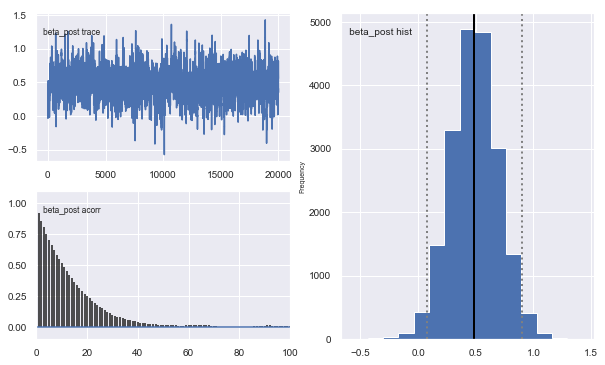

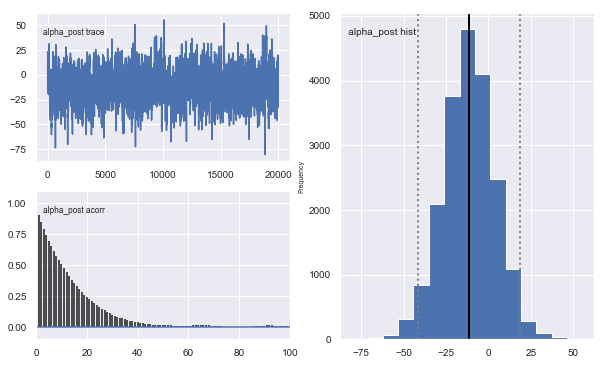

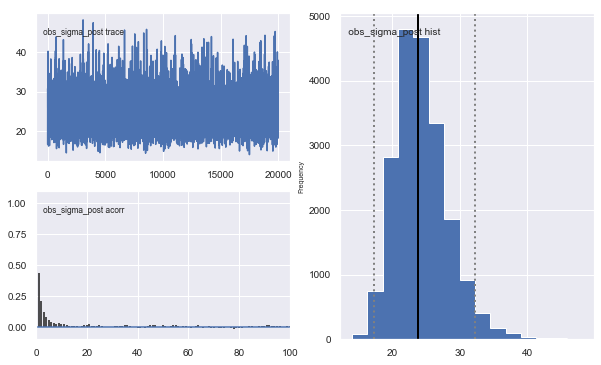

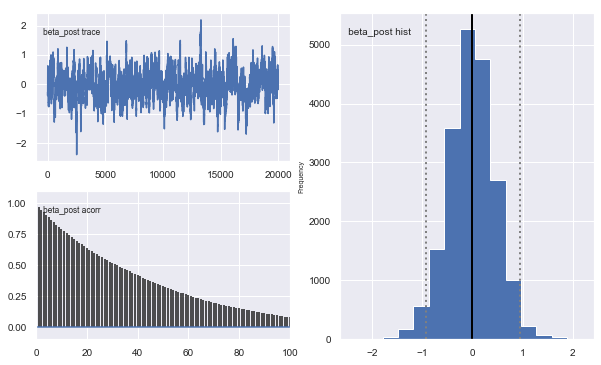

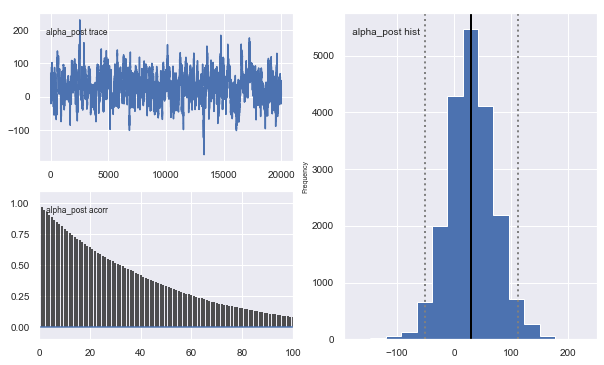

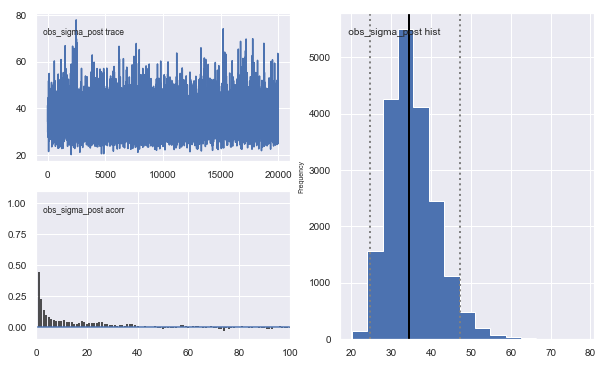

In [36]:
results = dict()

for i,k in enumerate(weeklies.keys()):

    results[k] = inference(weeklies[k]['oxford_stringency_current'],weeklies[k]['dead_inc_per_M'])



In [37]:


print (results['Argentina'].describe())
results['Sweden'].describe()


          beta_post    alpha_post  obs_sigma_post
count  20000.000000  20000.000000    20000.000000
mean       0.046539     -0.010844        5.196791
std        0.043494      3.766635        0.858186
min       -0.108333    -14.632850        3.125230
25%        0.017089     -2.535088        4.591062
50%        0.046511      0.030631        5.089788
75%        0.075459      2.490936        5.683676
max        0.219056     15.202672       11.721180


,beta_post,alpha_post,obs_sigma_post
count,20000.000000,20000.000000,20000.000000
mean,1.105951,-16.778962,16.906211
std,0.299565,11.908890,2.871076
min,0.004670,-62.258501,9.282055
25%,0.907176,-24.802285,14.815982
50%,1.110998,-17.071390,16.544394
75%,1.306288,-8.916421,18.549970
max,2.202479,30.123529,34.307717


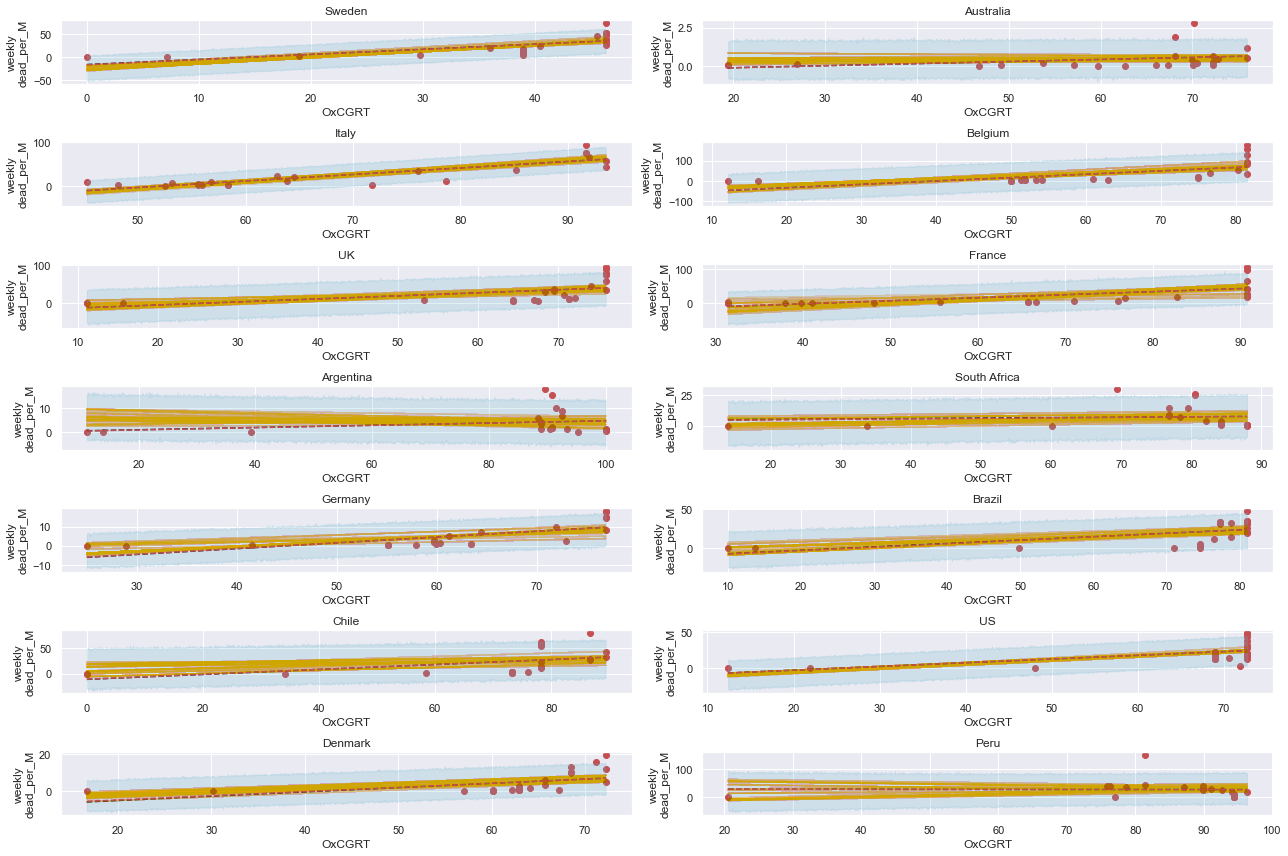

In [38]:
fig,axes = plt.subplots(7,2,figsize=(18,12))

nr_samples = 1000

for i,k in enumerate(weeklies.keys()):

    axes[i % 7,i %2].scatter(weeklies[k]['oxford_stringency_current'],weeklies[k]['dead_inc_per_M'],color='r')

    slope,intercept,_,_,_ = sps.linregress(weeklies[k]['oxford_stringency_current'],
                                           weeklies[k]['dead_inc_per_M'])

    X = np.linspace(weeklies[k]['oxford_stringency_current'].min(),
                    weeklies[k]['oxford_stringency_current'].max(),nr_samples)
        
    #X = np.linspace(0,100,nr_samples) # for computing samples, this must concur with nr of sample rows
    
    alpha_mean = results[k].alpha_post.mean()
    beta_mean = results[k].beta_post.mean()
    
    axes[i % 7, i %2].plot(X,X*beta_mean + alpha_mean,'--',color='k')
    
    rows = np.random.choice(range(len(weeklies[k].index)),replace=True,size=nr_samples)
    
    lines = [X[i] * results[k].iloc[rows].beta_post + results[k].iloc[rows].alpha_post for i in range(len(X))]
    
    samples = np.array([pm.rnormal(X[i] * results[k].iloc[rows].beta_post + results[k].iloc[rows].alpha_post,
                                      1 / results[k].iloc[rows].obs_sigma_post ** 2,size=len(X)) for i in range(len(X))])

    high,low = np.percentile(samples,[5.5,94.5],axis=1)
    
    axes[i % 7, i % 2].plot(X,lines,color='orange',alpha=0.01)
    
    least_squares = X * slope + intercept

    axes[i % 7, i % 2].plot(X,least_squares,'--',color='r')
    
    axes[i % 7, i % 2].fill_between(X,high,low,color='c',alpha=0.2)

    
    axes[i % 7, i % 2].set_title(k)
    axes[i % 7, i % 2].set_ylabel('weekly\ndead_per_M')
    axes[i % 7, i % 2].set_xlabel('OxCGRT')
    #axes[i % 7,i % 2].set_ylim([0,150])
    
plt.tight_layout()
plt.savefig('OxCGRT_regression_14.jpg',format='jpg',dpi=400)

In [39]:
swe_weekly = weeklies_df.loc[weeklies_df['country'] == 'Sweden']
bel_weekly = weeklies_df.loc[weeklies_df['country'] == 'Belgium']
arg_weekly = weeklies_df.loc[weeklies_df['country'] == 'Argentina']

In [40]:
swe_weekly

,dead_inc_per_M,dead_per_M,oxford_stringency_current,country
date,,,,
2020-03-05,0.000000,0.000000,0.000000,Sweden
2020-03-12,0.099017,0.099017,7.142857,Sweden
2020-03-19,0.891154,3.069530,18.917143,Sweden
2020-03-26,3.168547,16.832908,29.760000,Sweden
2020-04-02,19.506370,92.580995,35.981429,Sweden
2020-04-09,44.359664,311.309783,45.505714,Sweden
2020-04-16,51.092827,653.908973,46.300000,Sweden
2020-04-23,72.678556,1095.723303,46.300000,Sweden
2020-04-30,51.983981,1549.617720,46.300000,Sweden


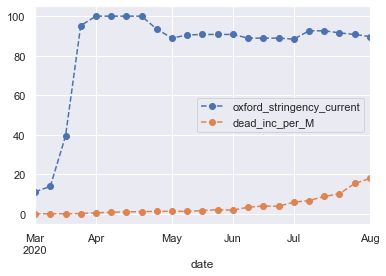

In [41]:

arg_weekly.plot(y=['oxford_stringency_current','dead_inc_per_M'],style='o--')

In [42]:
all_countries = pd.DataFrame()

for c in countries.groups:
    country = countries.get_group(c)
    inc = country['dead'] - country['dead'].shift()
    inc.name='inc'
    country = pd.concat([country,inc],axis=1)
    
    country = country.replace(np.inf,np.nan)
    country = country.dropna()
    all_countries = pd.concat([all_countries,country],axis=0)
    


In [43]:
all_countries.head(50)


,date,confirmed,dead,oxford_stringency_current,country,oxford_stringency_mean,pop,dead_per_M,abb,inc
160,2020-03-02,1.0,0.0,27.78,Afghanistan,73.065597,38928346,0.000000,AFG,0.0
166,2020-03-08,4.0,0.0,27.78,Afghanistan,73.065597,38928346,0.000000,AFG,0.0
169,2020-03-11,7.0,0.0,27.78,Afghanistan,73.065597,38928346,0.000000,AFG,0.0
173,2020-03-15,10.0,0.0,38.89,Afghanistan,73.065597,38928346,0.000000,AFG,0.0
174,2020-03-16,16.0,0.0,38.89,Afghanistan,73.065597,38928346,0.000000,AFG,0.0
175,2020-03-17,21.0,0.0,38.89,Afghanistan,73.065597,38928346,0.000000,AFG,0.0
176,2020-03-18,22.0,0.0,41.67,Afghanistan,73.065597,38928346,0.000000,AFG,0.0
177,2020-03-19,22.0,0.0,41.67,Afghanistan,73.065597,38928346,0.000000,AFG,0.0
178,2020-03-20,22.0,0.0,41.67,Afghanistan,73.065597,38928346,0.000000,AFG,0.0
179,2020-03-21,24.0,0.0,41.67,Afghanistan,73.065597,38928346,0.000000,AFG,0.0


In [44]:
select_countries = ['Sweden','UK','Spain','Italy','UK','Belgium','France','US','Germany']
select_countries = ['Sweden','UK','Belgium']

mask = all_countries['country'].isin(select_countries)

selected_countries = (all_countries[mask]).copy()
selected_countries

,date,confirmed,dead,oxford_stringency_current,country,oxford_stringency_mean,pop,dead_per_M,abb,inc
1833,2020-03-02,17.0,0.0,11.11,Belgium,63.049434,11589623,0.000000,BEL,0.0
1834,2020-03-03,37.0,0.0,11.11,Belgium,63.049434,11589623,0.000000,BEL,0.0
1835,2020-03-04,72.0,0.0,13.89,Belgium,63.049434,11589623,0.000000,BEL,0.0
1836,2020-03-05,126.0,0.0,13.89,Belgium,63.049434,11589623,0.000000,BEL,0.0
1837,2020-03-06,207.0,0.0,13.89,Belgium,63.049434,11589623,0.000000,BEL,0.0
...,...,...,...,...,...,...,...,...,...,...
9077,2020-08-02,303952.0,46193.0,68.06,UK,63.295786,67886011,680.449467,GBR,74.0
9078,2020-08-03,304695.0,46201.0,68.06,UK,63.295786,67886011,680.567312,GBR,8.0
9079,2020-08-04,305623.0,46210.0,68.06,UK,63.295786,67886011,680.699887,GBR,9.0
9080,2020-08-05,306293.0,46299.0,68.06,UK,63.295786,67886011,682.010908,GBR,89.0


In [45]:
unique_country_abbs = selected_countries['abb'].unique()
print (unique_country_abbs)
country_idx = dict(zip(unique_country_abbs,range(1,len(unique_country_abbs) + 1)))
country_idx    

['BEL' 'SWE' 'GBR']


{'BEL': 1, 'SWE': 2, 'GBR': 3}

In [46]:
unique_days = selected_countries['date'].unique()
day_idx = dict(zip(pd.to_datetime(unique_days),range(1,len(unique_days) + 1)))


In [47]:
def create_country_index(abb):
    return country_idx[abb]

def create_day_index(day):
    return day_idx[day]

selected_countries['country_idx'] = selected_countries['abb'].apply(create_country_index)
selected_countries['day_idx'] = selected_countries['date'].apply(create_day_index)
selected_countries['ox_idx'] = selected_countries['oxford_stringency_current'].astype(int)
selected_countries['inc_per_M'] = selected_countries['inc'] / (selected_countries['pop'] / 1e6)
selected_countries

,date,confirmed,dead,oxford_stringency_current,country,oxford_stringency_mean,pop,dead_per_M,abb,inc,country_idx,day_idx,ox_idx,inc_per_M
1833,2020-03-02,17.0,0.0,11.11,Belgium,63.049434,11589623,0.000000,BEL,0.0,1,1,11,0.000000
1834,2020-03-03,37.0,0.0,11.11,Belgium,63.049434,11589623,0.000000,BEL,0.0,1,2,11,0.000000
1835,2020-03-04,72.0,0.0,13.89,Belgium,63.049434,11589623,0.000000,BEL,0.0,1,3,13,0.000000
1836,2020-03-05,126.0,0.0,13.89,Belgium,63.049434,11589623,0.000000,BEL,0.0,1,4,13,0.000000
1837,2020-03-06,207.0,0.0,13.89,Belgium,63.049434,11589623,0.000000,BEL,0.0,1,5,13,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9077,2020-08-02,303952.0,46193.0,68.06,UK,63.295786,67886011,680.449467,GBR,74.0,3,154,68,1.090063
9078,2020-08-03,304695.0,46201.0,68.06,UK,63.295786,67886011,680.567312,GBR,8.0,3,155,68,0.117845
9079,2020-08-04,305623.0,46210.0,68.06,UK,63.295786,67886011,680.699887,GBR,9.0,3,156,68,0.132575
9080,2020-08-05,306293.0,46299.0,68.06,UK,63.295786,67886011,682.010908,GBR,89.0,3,157,68,1.311021


In [48]:
selected_countries.corr()

,confirmed,dead,oxford_stringency_current,oxford_stringency_mean,pop,dead_per_M,inc,country_idx,day_idx,ox_idx,inc_per_M
confirmed,1.000000,0.993434,0.435573,0.394784,0.709419,0.462347,0.232475,5.933968e-01,5.455468e-01,0.436338,-0.123135
dead,0.993434,1.000000,0.452222,0.449089,0.717890,0.458612,0.235003,5.703701e-01,4.980120e-01,0.453836,-0.115030
oxford_stringency_current,0.435573,0.452222,1.000000,0.567660,0.297669,0.395336,0.475332,4.884123e-03,1.924529e-01,0.999879,0.486731
oxford_stringency_mean,0.394784,0.449089,0.567660,1.000000,0.524357,0.305595,0.302502,8.578344e-03,1.473110e-02,0.569406,0.095260
pop,0.709419,0.717890,0.297669,0.524357,1.000000,-0.057542,0.520474,8.559656e-01,7.616743e-03,0.297069,-0.015122
dead_per_M,0.462347,0.458612,0.395336,0.305595,-0.057542,1.000000,-0.168359,-2.531330e-01,8.446867e-01,0.397185,-0.190090
inc,0.232475,0.235003,0.475332,0.302502,0.520474,-0.168359,1.000000,4.275415e-01,-2.186529e-01,0.470288,0.597451
country_idx,0.593397,0.570370,0.004884,0.008578,0.855966,-0.253133,0.427541,1.000000e+00,1.948333e-17,0.003121,-0.075601
day_idx,0.545547,0.498012,0.192453,0.014731,0.007617,0.844687,-0.218653,1.948333e-17,1.000000e+00,0.192058,-0.324374
ox_idx,0.436338,0.453836,0.999879,0.569406,0.297069,0.397185,0.470288,3.120598e-03,1.920583e-01,1.000000,0.485164


In [49]:
def logit_pure(x):
    return (np.exp(x)) / (1 + np.exp(x))

def logistic_pure(p):
    return np.log(p / (1 - p))

In [50]:
country_idx = selected_countries['country_idx']
day_idx = selected_countries['day_idx']
ox_idx = selected_countries['ox_idx']

x = selected_countries['oxford_stringency_mean']

r_alpha = pm.rnormal(0,1/1**2,10)
r_beta = pm.rnormal(0,1/1**2,10)

#[ logit_pure(r_alpha + r_beta * x) for x in selected_countries['oxford_stringency_current']]

In [51]:
#PYMC
import pymc as pm
from pymc.Matplot import plot as pmplot


x = np.log(selected_countries['oxford_stringency_current'])

alpha = pm.Normal('alpha',0, 1 / 1 ** 2,size=len(unique_country_abbs))

beta = pm.Normal('beta',0, 1/ 1 ** 2,size=len(unique_days))

@pm.deterministic
def logit(country_idx=country_idx-1,x=x,day_idx=day_idx-1,alpha=alpha,beta=beta):
        
    return np.exp(alpha[country_idx] + beta[day_idx]*x) / (
        1 + np.exp(alpha[country_idx] + beta[day_idx]*x) )


lkh = pm.Binomial('lkh',n=selected_countries['pop'],p=logit,observed=True,
                      value=selected_countries['inc'])

model = pm.Model([alpha,beta,logit,lkh])

_map = pm.MAP(model)
_map.fit()

mcmc = pm.MCMC(model)
sample = mcmc.sample(50000,20000,3)

/usr/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/lib/python3.6/site-packages/scipy/optimize/optimize.py:2613: RuntimeWarning: invalid value encountered in subtract
  if (fx2 - fval) > delta:


 [-----------------100%-----------------] 50000 of 50000 complete in 196.7 sec

Plotting alpha_0
Plotting alpha_1
Plotting alpha_2


,BEL,SWE,GBR
count,10000.000000,10000.000000,10000.000000
mean,-10.424312,-10.661526,-10.649744
std,0.010588,0.014107,0.006028
min,-10.462136,-10.710752,-10.673821
25%,-10.431420,-10.671192,-10.653831
50%,-10.424438,-10.661436,-10.649687
75%,-10.417122,-10.651731,-10.645547
max,-10.386025,-10.606386,-10.629477


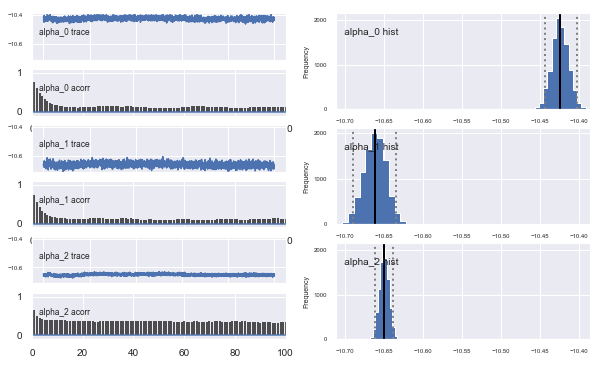

In [52]:
alpha = mcmc.trace('alpha')[:]
beta = mcmc.trace('beta')[:]

pmplot(alpha,'alpha')
#pmplot(beta,'beta')

result_alpha = pd.DataFrame(alpha,columns=unique_country_abbs)
result_beta = pd.DataFrame(beta)
result_beta.columns.name = 'day nr'

result_alpha.describe()

In [53]:
result_beta.describe()

day nr,0,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8.913704e-04,7.960785e-04,7.613787e-04,6.924321e-04,6.500626e-04,7.684329e-04,5.132536e-04,-8.681318,-9.989191,-11.900724,...,-1.723561,-2.198501,-2.684414,-4.144543,-1.467190,-1.078130,-5.302890,-7.031980,-4.853100,-11.980608
std,1.659279e-03,1.096528e-03,1.133237e-03,8.503376e-04,8.779024e-04,1.261502e-03,7.961512e-07,0.023937,0.030416,0.029365,...,0.034298,0.036765,0.035430,0.031853,0.031278,0.011875,0.019160,0.009852,0.025256,0.016954
min,1.614810e-07,1.624745e-07,2.650830e-09,1.242798e-07,8.718875e-08,9.114610e-08,5.116186e-04,-8.741249,-10.027042,-11.995517,...,-1.756746,-2.302033,-2.754724,-4.233284,-1.569906,-1.110074,-5.350158,-7.046321,-4.936031,-12.050708
25%,1.920727e-04,1.866134e-04,1.464832e-04,1.637107e-04,1.540550e-04,1.476319e-04,5.126190e-04,-8.703384,-10.014111,-11.923472,...,-1.745675,-2.233817,-2.714383,-4.168278,-1.482031,-1.084208,-5.320098,-7.037459,-4.874465,-11.985298
50%,4.563302e-04,4.775240e-04,3.976840e-04,4.135806e-04,3.746771e-04,3.871375e-04,5.133156e-04,-8.674425,-9.994333,-11.891340,...,-1.732808,-2.175276,-2.668193,-4.133342,-1.458342,-1.076194,-5.296776,-7.034552,-4.842957,-11.978917
75%,9.347603e-04,9.749014e-04,8.923084e-04,8.961786e-04,8.066536e-04,9.083218e-04,5.138700e-04,-8.660127,-9.977898,-11.876387,...,-1.725305,-2.169073,-2.657134,-4.114046,-1.443981,-1.071180,-5.288249,-7.030373,-4.836914,-11.971182
max,1.369475e-02,1.458548e-02,1.180274e-02,1.120783e-02,1.030488e-02,1.409216e-02,5.155331e-04,-8.635610,-9.876706,-11.853512,...,-1.595278,-2.160410,-2.638970,-4.109140,-1.425356,-1.052419,-5.270656,-6.975107,-4.813990,-11.952549


In [54]:
swe_p = np.zeros((10000,146))
gbr_p = np.zeros((10000,146))
bel_p = np.zeros((10000,146))



for c in range(len(result_beta.columns)):
    
    swe_p[:,c] = logit_pure(result_alpha['SWE'].add(result_beta[c]))
    gbr_p[:,c] = logit_pure(result_alpha['GBR'].add(result_beta[c]))
    bel_p[:,c] = logit_pure(result_alpha['BEL'].add(result_beta[c]))
    
swe_p = pd.DataFrame(swe_p)
gbr_p = pd.DataFrame(gbr_p)
bel_p = pd.DataFrame(bel_p)

swe_p.describe()

IndexError: index 146 is out of bounds for axis 1 with size 146

In [ ]:
ax = swe_p.describe().loc['mean'].plot(color='yellow',figsize=(18,12))
gbr_p.describe().loc['mean'].plot(ax=ax,color='b')
bel_p.describe().loc['mean'].plot(ax=ax,color='r')